In [1]:
from pathlib import Path
import io
from pprint import pprint
from PIL import Image
import torch

In [2]:
def load_all_checkpoints(ticker: str):
    """
    Load every checkpoint matching `{ticker}_*.pth` in the current working directory.
    For each checkpoint:
      1) load checkpoint dict (CPU),
      2) print hparams and train/val metrics,
      3) display train plot if present,
    """
    cwd = Path.cwd()
    ckpt_paths = sorted(cwd.glob(f"{ticker}_*.pth"))

    loaded = {}
    for p in ckpt_paths:
        print("Loading checkpoint:", p)
        ckpt = torch.load(p, map_location="cpu", weights_only=False)

        print("\nFeatures:")
        print(ckpt.get("features", {}))

        print("\nHyperparameters:")
        pprint(ckpt.get("hparams", {}))
        
        if "train_plot_png" in ckpt:
            try:
                img = Image.open(io.BytesIO(ckpt["train_plot_png"]))
                display(img)
            except Exception:
                print("  (train_plot_png present but could not display)")

        print("\nTrain metrics:", ckpt.get("train_metrics"))
        print(" Val metrics:", ckpt.get("val_metrics"))
        print('\n------------------------------------------------------------------------------------------------------------------------------\n')

    return loaded


Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.08987_fin.pth

Features:
{}

Hyperparameters:
{'ALPHA_SMOOTH': 0.0,
 'CLIPNORM': 3,
 'CONV_CHANNELS': 64,
 'CONV_DILATION': 1,
 'CONV_K': 3,
 'DROPOUT_LONG': 0.1,
 'DROPOUT_SHORT': 0.1,
 'DROPOUT_TRANS': 0.15,
 'EARLY_STOP_PATIENCE': 7,
 'FLATTEN_MODE': 'last',
 'LAMBDA_DELTA': 0.1,
 'LONG_UNITS': 128,
 'LOOK_BACK': 60,
 'MAX_EPOCHS': 70,
 'MICRO_SAMPLE_K': 16,
 'ONECYCLE_DIV_FACTOR': 10,
 'ONECYCLE_FINAL_DIV': 100,
 'ONECYCLE_MAX_LR': 0.0005,
 'ONECYCLE_PCT_START': 0.1,
 'ONECYCLE_STRATEGY': 'cos',
 'PRED_HIDDEN': 192,
 'SHORT_UNITS': 128,
 'TCN_CHANNELS': 64,
 'TCN_KERNEL': 3,
 'TCN_LAYERS': 2,
 'TRAIN_BATCH': 16,
 'TRAIN_PREFETCH_FACTOR': 4,
 'TRAIN_WORKERS': 8,
 'TRANSFORMER_D_MODEL': 192,
 'TRANSFORMER_FF_MULT': 4,
 'TRANSFORMER_HEADS': 4,
 'TRANSFORMER_LAYERS': 3,
 'USE_CONV': False,
 'USE_DELTA': False,
 'USE_LONG_LSTM': False,
 'USE_SHORT_LSTM': False,
 'USE_TCN': False,
 'USE_TRANSFORMER': True,

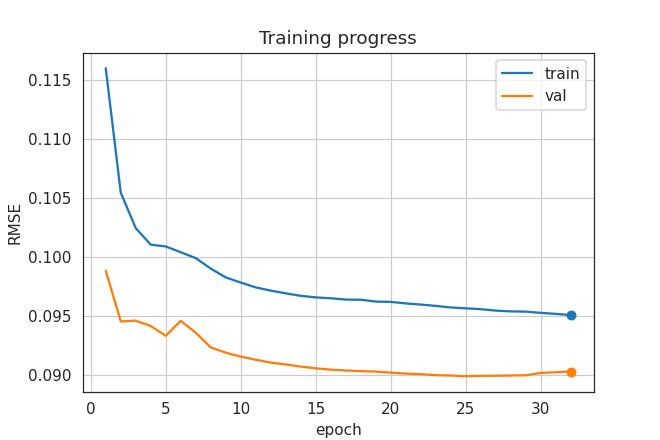


Train metrics: {'rmse': 0.09505198982113801, 'mae': 0.0651729255770102, 'r2': 0.3022436474573783}
 Val metrics: {'rmse': 0.09026552837543407, 'mae': 0.06111611650118121, 'r2': 0.3094288073134692}

------------------------------------------------------------------------------------------------------------------------------

Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.08990_fin.pth

Features:
{}

Hyperparameters:
{'ALPHA_SMOOTH': 0.0,
 'CLIPNORM': 3,
 'CONV_CHANNELS': 64,
 'CONV_DILATION': 1,
 'CONV_K': 3,
 'DROPOUT_LONG': 0.1,
 'DROPOUT_SHORT': 0.1,
 'DROPOUT_TRANS': 0.1,
 'EARLY_STOP_PATIENCE': 7,
 'FLATTEN_MODE': 'pool',
 'HUBER_DELTA': 0.1,
 'LAMBDA_DELTA': 0.1,
 'LONG_UNITS': 128,
 'LOOK_BACK': 60,
 'MAX_EPOCHS': 70,
 'MICRO_SAMPLE_K': 16,
 'ONECYCLE_DIV_FACTOR': 10,
 'ONECYCLE_FINAL_DIV': 100,
 'ONECYCLE_MAX_LR': 0.0005,
 'ONECYCLE_PCT_START': 0.1,
 'ONECYCLE_STRATEGY': 'cos',
 'PRED_HIDDEN': 128,
 'SHORT_UNITS': 128,
 'TCN_CHANNELS': 64,
 'T

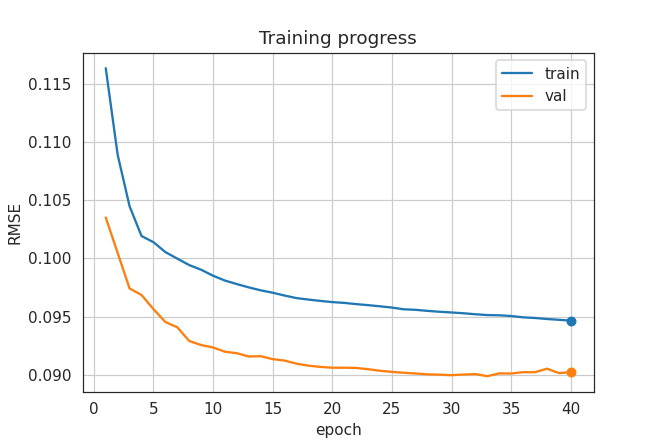


Train metrics: {'rmse': 0.09466400450579993, 'mae': 0.06499016330445063, 'r2': 0.30792825658824663}
 Val metrics: {'rmse': 0.09024484781584426, 'mae': 0.061820337921309025, 'r2': 0.3097452019098701}

------------------------------------------------------------------------------------------------------------------------------

Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.09012_fin.pth

Features:
['bb_w_20', 'sma_pct_14', 'atr_14', 'hour', 'eng_bb', 'rsi_14', 'obv_diff_14', 'range_pct', 'ret', 'sma_pct_28', 'plus_di_14', 'lower_shad', 'adx_14', 'atr_pct_14', 'body_pct', 'minus_di_14', 'volume', 'eng_rsi', 'eng_atr_div', 'eng_macd', 'upper_shad']

Hyperparameters:
{'ALPHA_SMOOTH': 0.0,
 'CLIPNORM': 2,
 'CONV_CHANNELS': 64,
 'CONV_DILATION': 1,
 'CONV_K': 3,
 'DROPOUT_LONG': 0.1,
 'DROPOUT_SHORT': 0.1,
 'DROPOUT_TRANS': 0.05,
 'EARLY_STOP_PATIENCE': 8,
 'FLATTEN_MODE': 'last',
 'HUBER_DELTA': 0.1,
 'LAMBDA_DELTA': 0.1,
 'LONG_UNITS': 128,
 'LOOK_BACK'

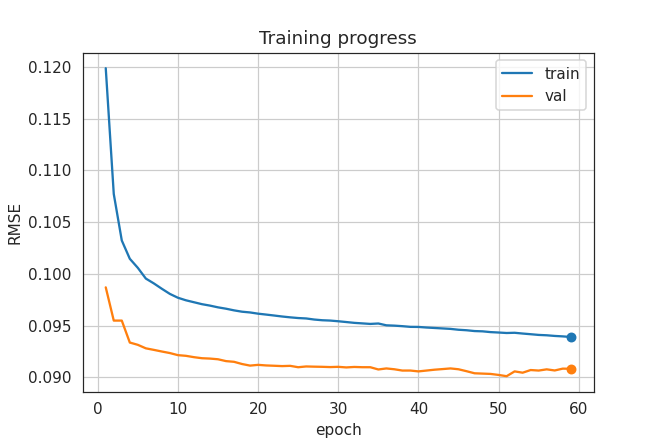


Train metrics: {'rmse': 0.09390529902895425, 'mae': 0.06444636232066699, 'r2': 0.31897732314309657}
 Val metrics: {'rmse': 0.09083588455054757, 'mae': 0.0630932179374947, 'r2': 0.3006742823203572}

------------------------------------------------------------------------------------------------------------------------------



{}

In [3]:
load_all_checkpoints("AAPL")